In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import cos, asin, sqrt, pi

In [2]:
# loading dataset into dataframe
Data_frame = pd.read_csv("uber.csv")

In [3]:
Data_frame.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Making copy of original dataframe
Data_frame_copy = Data_frame.copy()

In [5]:
Data_frame_copy.shape
# Print shape of dataframe like number of rows and number of columns

(200000, 9)

In [6]:
# Removing columns that are not required
Data_frame_copy.drop(columns=['Unnamed: 0','key'],inplace=True)
#Drop function used to drop columns or rows
#In drop function columns which are need to delete/drop are passed in columns list
#In drop function inplace is used so changes are applied on original dataframe if not used need to create new dataframe that store result

In [7]:
Data_frame_copy.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
# Basic information about dataframe
Data_frame_copy.info()
# Print Column_name, Non-Null row count and Datatype of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [9]:
# Checking for Null values in Dataframe
Data_frame_copy.isnull().sum()
# Print column_name and count of null values present

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
# Since number of null values are only 1 therefore we can drop them without much dataloss
Data_frame_copy.dropna(inplace=True)
# Data_frame_copy["dropoff_longitude"] = Data_frame_copy["dropoff_longitude"].replace(np.nan,Data_frame_copy["dropoff_longitude"].mean())

In [11]:
# Checking for Null values in Dataframe
Data_frame_copy.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

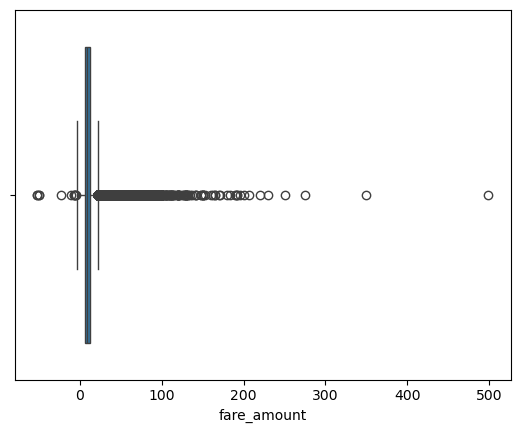

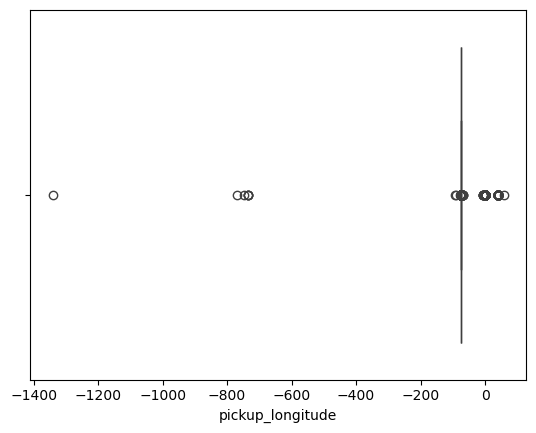

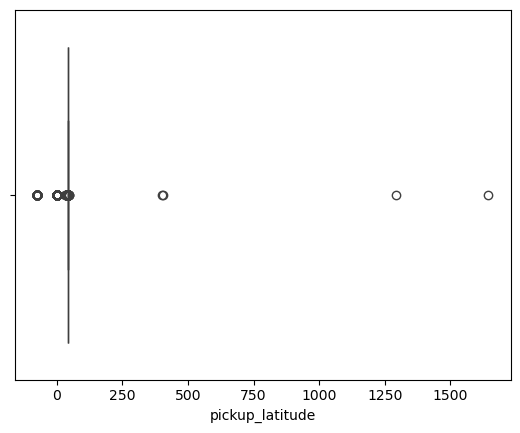

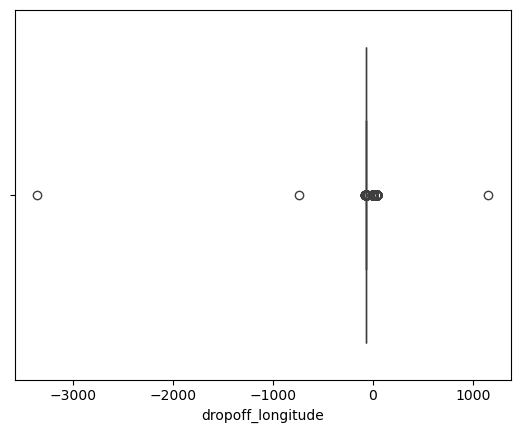

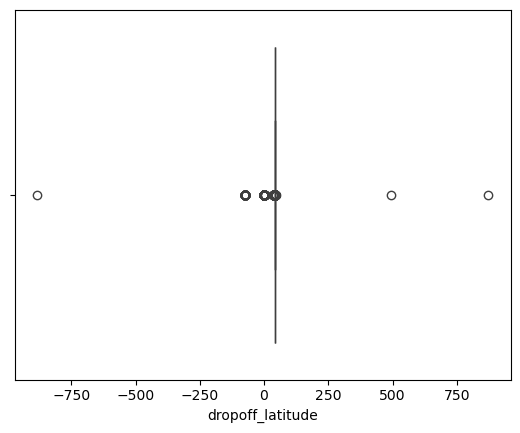

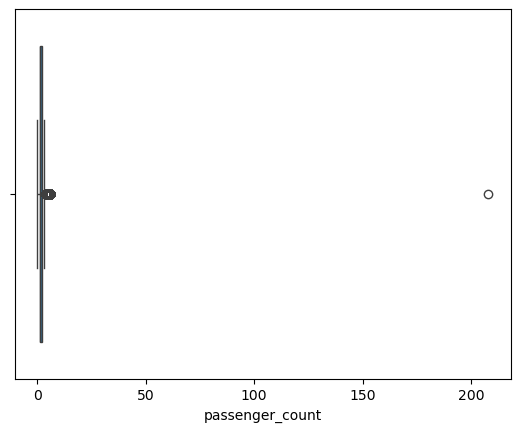

In [12]:
# Drawing boxplots for outlier detection
for columns in Data_frame_copy.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=Data_frame_copy,x=columns)

In [13]:
# Handling outliers complex but simple just need to understand conditions 
Data_frame_copy = Data_frame_copy[
    (Data_frame_copy.pickup_latitude > -90) & (Data_frame_copy.pickup_latitude < 90) & # Latitude need to have value between -90 to 90
    (Data_frame_copy.dropoff_latitude > -90) & (Data_frame_copy.dropoff_latitude < 90) & # Latitude need to have value between -90 to 90
    (Data_frame_copy.pickup_longitude > -180) & (Data_frame_copy.pickup_longitude < 180) & # Longitude need to have value between -180 to 180
    (Data_frame_copy.dropoff_longitude > -180) & (Data_frame_copy.dropoff_longitude < 180) & # Longitude need to have value between -180 to 180
    (Data_frame_copy.fare_amount > 0) & # Fare amount need to more than zero
    (Data_frame_copy.passenger_count > 0) & (Data_frame_copy.passenger_count < 50) # Number of passenger per ride need to have between 0 to 50
]

In [48]:
Data_frame_copy.shape

(193221, 10)

In [14]:
# Calculating distance between pickup_point and dropoff_point since price mainly depend on distance rather than other attributes
# Step 1
# Converting Degree measure into Radian measure
Data_frame_copy["pickup_longitude"], Data_frame_copy["dropoff_longitude"], Data_frame_copy["pickup_latitude"], Data_frame_copy["dropoff_latitude"] = map(np.radians, [Data_frame_copy["pickup_longitude"], Data_frame_copy["dropoff_longitude"], Data_frame_copy["pickup_latitude"], Data_frame_copy["dropoff_latitude"]])
# Step 2
# Calculate difference between drop_off latitude and pickup latitude and store it in new column name latitude_diff
Data_frame_copy["latitude_diff"] = Data_frame_copy["dropoff_latitude"] - Data_frame_copy["pickup_latitude"]
# Step 3
# Calculate difference between drop_off longitude and pickup longitude and store it in new column name longitude_diff
Data_frame_copy["longitude_diff"] = Data_frame_copy["dropoff_longitude"] - Data_frame_copy["pickup_longitude"]
# Step 4
# Calculating actual distance and store it in distance column
Data_frame_copy["Distance"] = 2 * 6371 * np.arcsin(np.sqrt(np.sin(Data_frame_copy["latitude_diff"]/2.0)**2 +
                                                           np.cos(Data_frame_copy["dropoff_latitude"]) * np.cos(Data_frame_copy["pickup_latitude"]) 
                                                        * np.sin(Data_frame_copy["longitude_diff"]/2.0)**2))

In [15]:
Data_frame_copy.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,latitude_diff,longitude_diff,Distance
0,7.5,2015-05-07 19:52:06 UTC,-1.291540,0.711018,-1.291535,0.710754,1,-0.000264,0.000005,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-1.291445,0.710842,-1.291451,0.711227,1,0.000386,-0.000006,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-1.291632,0.711061,-1.290890,0.711617,1,0.000556,0.000741,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-1.291127,0.711935,-1.290938,0.712153,3,0.000218,0.000189,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-1.290235,0.711118,-1.291074,0.711418,5,0.000300,-0.000839,4.475450


<Axes: xlabel='Distance'>

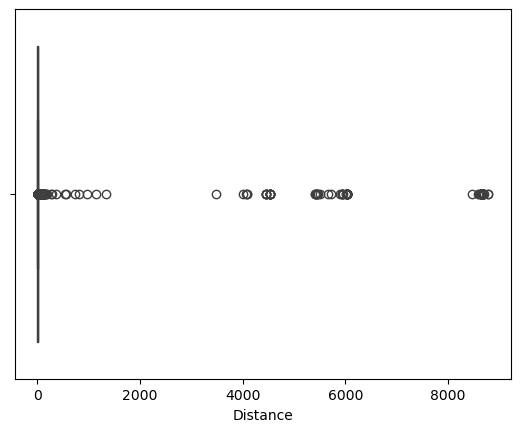

In [16]:
# Checking for outlier in distance column
sns.boxplot(data=Data_frame_copy,x='Distance')

In [17]:
# Handling outliers in distance column
Data_frame_copy = Data_frame_copy[(Data_frame_copy['Distance'] < 200) & (Data_frame_copy['Distance'] > 0)]

In [18]:
# Spliting Data into Dependent and Independant variable
x = Data_frame_copy[['Distance']].values
y = Data_frame_copy['fare_amount'].values.reshape(-1,1)

In [19]:
# Spliting Data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=10)

In [20]:
# Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
y_train = std.fit_transform(y_train)
y_test = std.transform(y_test)

In [21]:
# Defining function that take model object as parameter and print RMSE, MAE and R2-square
from sklearn.metrics import root_mean_squared_error,r2_score, mean_absolute_error
def fit_predict(model):
    model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    r_squared = r2_score(y_test,y_pred)
    RMSE = root_mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    print('R-squared: ', r_squared)
    print('RMSE: ', RMSE)
    print("MAE:  ",MAE)

In [22]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

R-squared:  0.6041167920841168
RMSE:  0.6290054895695946
MAE:   0.2755232959095983


In [23]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

R-squared:  0.6541398002040316
RMSE:  0.587924000257218
MAE:   0.2918046134596004
